# Iteration and Simulation

In the case that we want to repeat a programming block of statements or expressions multiple times, the control statement `for` can be used. Before we continue with the example from the previous section, we'll focus on the foundation of this *iteration* tool.

A `for` statement can *iterate* through a sequence to perform some action on each of its elements. This sequence can really be any *iterable* object, including a list, a string, or a range of numbers, to name a few. The general form of a `for` statement is below:

```python
for item in sequence:
    action    
```

Notice we specify a name to assign to the value of each of the sequence's items – here `item`. This name is assigned to each of the values `in` the sequence, sequentially. And for each of these assignments – or "loops" – the indented body of the `for` statement is executed (here "action").

For example, to print out each element in a given list we might use the following code.

In [1]:
adjectives = ["red", "rotten", "tasty"]

for word in adjectives:
    print(word)

red
rotten
tasty


The above dictates that for each element `word` in the list `adjectives`, we execute the indented body: `print(word)`.

`word` was sequentially assigned the value of each of the elements in the list. We can alternately use something else since this choice of name does not matter. The `for` statement below also prints out each element in the list `adjectives`.

In [2]:
for item in adjectives:
    print(item)

red
rotten
tasty


Note that what we iterate over does not need to be directly related to the body of the `for` statement. In fact, `for` statements are useful to simply execute the body or action a given number of times.

In the first example below, the value of the *iterator* is used in the body of the `for` statement; in the second example, the `for` statement uses this iterator merely to repeat or loop through the body statement a certain number of times. 

In [3]:
for i in range(3):
    print(i)

0
1
2


In [4]:
for i in range(3):
    print('potato')

potato
potato
potato


## Nested *for* loops

Suppose we want to repeat a process for each loop of a repeated process. We can accomplish this by nesting a `for` statement within a `for` statement.

For example, suppose we have two lists, and we want to pair every element in `list_1` with every element in `list_2`. We *could* write out by hand all the possible combinations pairing elements of `list_1` with `list_2` … or, we could use nested `for` statements to systematically consider each element in `list_2` for each element in `list_1`.

This takes the following form:

```python
for item_1 in list_1:
    for item_2 in list_2:
        print(item_1, item_2)
```

For a more concrete example, consider the list of `adjectives` above, and a new list of `fruits`. We'll use a nested `for` statement to print all possible `adjective`, `fruit` combinations. 

In [5]:
fruits = ["apple", "banana", "cherry"]

In [6]:
for adjective in adjectives:
    for fruit in fruits:
        print(adjective, fruit)

red apple
red banana
red cherry
rotten apple
rotten banana
rotten cherry
tasty apple
tasty banana
tasty cherry


Alternatively, we could pick *random* combinations; though, in doing so we cannot guarantee that each combination will be distinct.

Setting `combos = 5` below, the `for` statement prints a random adjective paired with a random fruit for each number in the range to `combos` – really, repeating these selections `combos` (or 5) times.

Feel free to experiment with the number of combinations to print below.

In [7]:
import numpy as np

combos = 5 

for i in np.arange(combos):
    print(np.random.choice(adjectives), np.random.choice(fruits))

rotten banana
rotten banana
rotten apple
tasty banana
red banana


## Simulating the six-sided die: How many evens?

In the last section we experimented with finding the number of even dice rolls when rolling a six-sided die 100 times. Now we can simulate repeating this experiment many times using the process of iteration.

Below we'll redefine the six-sided die and other relevant items from the last section.

In [8]:
die = np.arange(1, 7)

def parity(input_integer): 
    if (input_integer % 2) == 0:
        return "even"
    else:
        return "odd"
    
vec_parity = np.vectorize(parity) 

Now we'll set the desired number of iterations for this experiment and create a `for` loop to execute the experiment of rolling a die 100 times, checking whether the rolls are even, and then appending the number of evens to an array.

After the experiments are simulated, we'll use the array of results to summarize our experiment. Finding the minimum and maximum number of evens rolled out of the total 100 rolls as well as the average of evens gives us useful and interesting information. 

In the code below, we use `np.empty(0)` to create an empty array. As we iterate through the loop, we add the results of our experiment to this array.

Experiment below with different values for `num_experiments`, but be careful as it is easy to set up a long run time!

In [9]:
num_experiments = 10000

total_evens = np.empty(0)

for i in np.arange(num_experiments):  # alternatively we could use: range(num_experiments)
    choices = np.random.choice(die, 100)
    labels = vec_parity(choices)
    
    total_evens = np.append(total_evens, sum(labels == 'even'))


# Since these aren't indented, they are outside of the "for" loop, and executed after it's done:

print('Number of experiments:', len(total_evens))
print('Min Evens (out of 100):', min(total_evens))
print('Max Evens (out of 100):', max(total_evens))
print('Mean Evens (out of 100):', round(np.mean(total_evens)))

Number of experiments: 10000
Min Evens (out of 100): 33.0
Max Evens (out of 100): 68.0
Mean Evens (out of 100): 50


If you want to see the contents of the result array you can run the following line:

In [10]:
total_evens

array([49., 41., 44., ..., 52., 44., 50.])

We can visualize these results using a histogram.

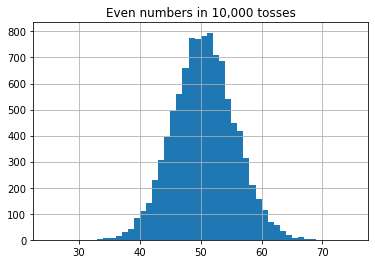

In [11]:
import pandas as pd

legend = f'Even numbers in {num_experiments:,} tosses'

pd.DataFrame({legend: total_evens}).hist(bins=np.arange(25, 76));

As we can see, for a large enough number of experiments, the distribution of evens is symmetric, with an average of 50 out of 100 even rolls of the die!

We can also see that a majority of the data is contained in the range 40-60. Thus, rolling a six-sided die 100 times, the most common outcomes occur in that range.